# Boundary Value Problems

* Shooting Method
* Relaxation Method
* Over-relaxation Method (NOT IMPLEMENTED | EXPLAINED HERE: https://en.m.wikipedia.org/wiki/Successive_over-relaxation)

## Shooting Method

### I have NOT implemented a Plug & Play Method, but modifications are easy.

### References: https://en.m.wikipedia.org/wiki/Shooting_method

### WITHOUT USING RFA (Root Finding Algorithm)

SUCCESS | SOLUTION CONVERGED!


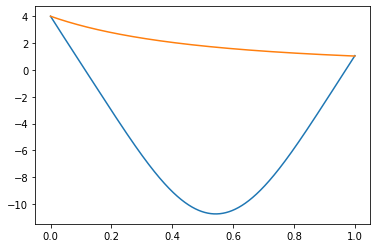

In [3]:
import numpy as np, scipy as sc, matplotlib.pyplot as plt

# Taken from ODEs.ipynb
def leapfrog_solver(A, x0, v0, t0, tn, dt=1e-3):
    """
    INPUT:
    A: "Accelaration" | Function, on RHS of the original ODE
    x0: Initial Condition | Value of x, at t = t0
    v0: Initial Condition/Velocity | Value of dx/dt, at t = t0
    t0: Start Time
    tn: End Time
    dt: Time Step Size | Default = 1e-3
    OUTPUT:
    t: numpy array | Timestamps, for which the system was solved
    x: numpy array | The function to be solved for
    """
    N = int(np.ceil((tn - t0)/dt))
     
    x = np.zeros(N, dtype=float)
    v = np.zeros(N, dtype=float)
    t = np.linspace(t0, tn, N, dtype=float)
    
    # Initial Conditions
    x[0] = x0
    v[0] = v0 + A(x[0])*(dt/2) # = v_{1/2} = v_0 + a_0(dt/2). Next step will be v_{3/2} == v[1] and so on...

    for i in range(N-1):
        x[i+1] = x[i] + v[i]*dt
        v[i+1] = v[i] + A(x[i])*dt
    
    return t, x

def bvp_shoot(f, x_lim, t_lim, v0_guesses, dt=1e-3):
    """
    Shooting Algorithm for Boundary Value Problems
    Uses Leapfrog Integration for the IVP & Newton-Raphson for Root Finding
    
    INPUT:
    f: "Accelaration" | Function, on RHS of the original ODE
    x_lim: Tuple | Contains Initial Conditions, x(t = t0) = x0 & x(t = tn) = xn | (x0, xn)
    t_lim: Tuple | Contains Time Limits | Start Time, t0 and End Time, tn | (t0, tn)
    v0_guesses: Numpy Array | Contains initial guesses for x'(t = t0)
    dt: Time Step Size | Default = 1e-3
    OUTPUT:
    t: numpy array | Timestamps, for which the system was solved
    x: numpy array | The function to be solved for
    """
    SOL_FLAG = False # "True" indicates discovery of at least 1 solution
    for i, v0 in enumerate(v0_guesses):
        t, x = leapfrog_solver(f, x_lim[0], v0, *t_lim, dt)
        if np.abs(x_lim[1] - x[-1]) <= 0.1: # TOL
            plt.plot(t, x)
            SOL_FLAG = True

    if SOL_FLAG:
        print("SUCCESS | SOLUTION CONVERGED!")
    else:
        print("FAILURE | NO SOLUTION FOUND!")
     

# MODULE TEST
f = lambda x: 1.5*x**2
x_lim = (4, 1)
t_lim = (0, 1)
v0_guesses = np.arange(-100, 0)
dt = 1e-3

bvp_shoot(f, x_lim, t_lim, v0_guesses, dt)

### USING RFA (SECANT METHOD)

ROOT:  -10.0 64


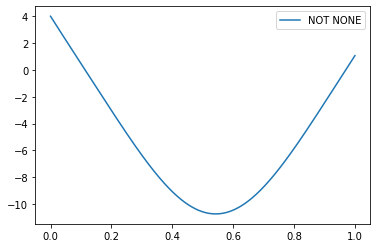

In [2]:
import numpy as np, scipy as sc, matplotlib.pyplot as plt

# Taken from ODEs.ipynb
def leapfrog_solver(A, x0, v0, t0, tn, dt=1e-3):
    """
    INPUT:
    A: "Accelaration" | Function, on RHS of the original ODE
    x0: Initial Condition | Value of x, at t = t0
    v0: Initial Condition/Velocity | Value of dx/dt, at t = t0
    t0: Start Time
    tn: End Time
    dt: Time Step Size | Default = 1e-3
    OUTPUT:
    t: numpy array | Timestamps, for which the system was solved
    x: numpy array | The function to be solved for
    """
    N = int(np.ceil((tn - t0)/dt))
     
    x = np.zeros(N, dtype=float)
    v = np.zeros(N, dtype=float)
    t = np.linspace(t0, tn, N, dtype=float)
    
    # Initial Conditions
    x[0] = x0
    v[0] = v0 + A(x[0])*(dt/2) # = v_{1/2} = v_0 + a_0(dt/2). Next step will be v_{3/2} == v[1] and so on...

    for i in range(N-1):
        x[i+1] = x[i] + v[i]*dt
        v[i+1] = v[i] + A(x[i])*dt
    
    return t, x

# Adapted from rfa_secant() from Root Finding Algorithms.ipynb
def rfa_secant(f, t0, t1, iters, tol=1e-6):
    """
    f: Functional values, with index, for the function, whose root is to be found
    t0: First guess for the root
    t1: Second guess for the root
    iters: Number of Iterations
    tol: Tolerance value, for Meshing & Convergence Check
    """
    func = np.take(f, indices=0, axis=1)
    # Array of successive "better" guesses for the root (ideally)
    t = np.array([t0, t1] + iters*[None], dtype=float)
    # Initial Guesses
    t[0], t[1] = t0, t1

    for i in range(iters):
        t[i+2] = t[i+1] - func[i+1]*((t[i+1] - t[i])/(func[i+1] - func[i]))
        # Convergence Test
        if np.abs(func[i+2]) <= tol:
            return t[i+2], i+2
    else:
        print("Last calculated guess does not satisfy the Tolerance Limit, in the specified Number of Iterations.")
        return None
    

def bvp_shoot(f, x_lim, t_lim, v0_guesses, guess_for_rfa, dt=1e-3):
    """
    Shooting Algorithm for Boundary Value Problems
    Uses Leapfrog Integration for the IVP & Secant Method for Root Finding
    
    INPUT:
    f: "Accelaration" | Function, on RHS of the original ODE
    x_lim: Tuple | Contains Initial Conditions, x(t = t0) = x0 & x(t = tn) = xn | (x0, xn)
    t_lim: Tuple | Contains Time Limits | Start Time, t0 and End Time, tn | (t0, tn)
    v0_guesses: Numpy Array | Contains initial guesses for x'(t = t0)
    guess_for_rfa: Tuple | Contains the Initial Root Guess, Number of Iterations and Tolerance Value for RFA | (x0, x1, iters, tol)
    dt: Time Step Size | Default = 1e-3
    OUTPUT:
    t: numpy array | Timestamps, for which the system was solved
    x: numpy array | The function to be solved for
    """
    F, t0, x0 = [], [], []
    for i, v0 in enumerate(v0_guesses):
        t, x = leapfrog_solver(f, x_lim[0], v0, *t_lim, dt)
        t0.append(t)
        x0.append(x)
        F.append([x_lim[1] - x[-1], i]) # Function at x1, whose roots are to be found | 'i' is to coorelate with guess
    
    root, index = rfa_secant(np.array(F, dtype=float), *guess_for_rfa)
    print("ROOT: ", root, index)
    
    if root is not None: # If root is found, it means, A SOLUTION has been found
        return t0[index], x0[index]
    else:
        print("Solution did not converge.")
        return None, None


# MODULE TEST
f = lambda x: 1.5*x**2
x_lim = (4, 1)
t_lim = (0, 1)
v0_guesses = np.arange(-100, 0)


t0_rfa = -10
t1_rfa = -10
iters_rfa = 100
tol_rfa = 0.1

guess_for_rfa = (t0_rfa, t1_rfa, iters_rfa, tol_rfa)
dt = 1e-3

t_res, x_res = bvp_shoot(f, x_lim, t_lim, v0_guesses, guess_for_rfa, dt)
if t_res is not None and x_res is not None:
    plt.plot(t_res, x_res, label='NOT NONE')
    plt.legend()

## Relaxation Method

* Relaxation methods are methods of solving (Partial) Differential Equations, that involve splitting the sparse matrix, that arises from Finite Differencing, then iterating, until a solution is found. ([Wolfram MathWorld](http://mathworld.wolfram.com/RelaxationMethods.html))


#### Example ODE & Solution (from my Semester Exam):

$$\frac{d^2y}{dx^2} + \frac{1}{x}\frac{dy}{dx} + \left(1 - \frac{1}{x^2}\right)y =  x, \quad y(0) = 0,\:\:y(5) = 1$$

Discretizing (using Trapezoidal Rule):

$$\frac{y_{i+1} + y_{i-1} - 2y_i}{h^2} +  \frac{1}{x_i}\left(\frac{y_{i+1} - y_{i-1}}{2h}\right) + \left(1 - \frac{1}{x_i^2}\right)y_i = x_i$$

On collecting terms, we get;

$$y_{i+1}\left(\frac{1}{h^2} + \frac{1}{2x_ih}\right) + y_{i}\left(1 - \frac{2}{h^2} - \frac{1}{x_i^2}\right) +  y_{i-1}\left(\frac{1}{h^2} - \frac{1}{2x_ih}\right) = x_i$$

So, now, we have our coefficients to plug into $A$ and $B$, in the matrix equation, $AY = B \implies Y = A^{-1}B$, where $A$ has the coefficients of $y_{i-1}, y_{i}, y{i+1}$, per step, while $B$ contains $x_i$.

* Here, I had checked the Invertibility of $A$, and then plugged into `inv()`. Reason for using `inv()`, instead of usual Linear Equation Solvers is simply the availability of `inv()` and no other solver (Library functions were not allowed). The usual process would involve using such Solvers and not direct Matrix Inversion. Although, as remarked in the code below, the inversion process itself encapsulates many of the processes used in such Solvers.

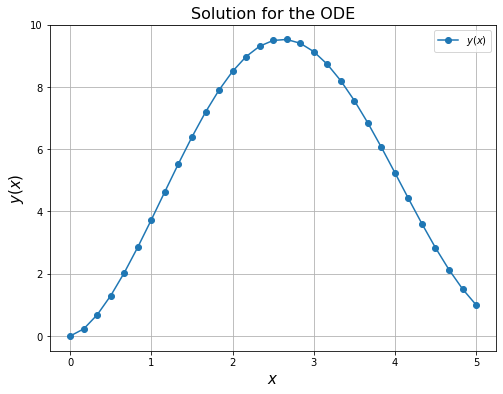

In [5]:
import numpy as np, matplotlib.pyplot as plt

def Inv(A):
    """
    Return the inverse of a square matrix, A
    Makes use of the LU Decomposition procedure implicitly
    """
    # Input Check | If A is not square or if A is singular
    if(A.shape[0] != A.shape[1] or np.linalg.det(A) == 0):
        print("The given matrix is not invertible.\n")
        return None
    
    else:
        dim = A.shape[0]
        left_aug = A # Left portion of Augmented Matrix
        Inv = np.identity(dim)  # Inverse of A
        
        # Making Inv, Lower Triangular, and left_aug, Upper Triangular
        for i in np.arange(dim-1):
            for j in np.arange(i+1, dim):
                Inv[j] = Inv[j] - (left_aug[j][i]/left_aug[i][i])*Inv[i]  # Row Operation for Inv
                left_aug[j] = left_aug[j] - (left_aug[j][i]/left_aug[i][i])*left_aug[i]  # Row Operation for left_aug
        
        for i in np.arange(1, dim):
            for j in np.arange(0,i):
                Inv[j] = Inv[j] - (left_aug[j][i]/left_aug[i][i])*Inv[i]  # Row Operation for Inv
                left_aug[j] = left_aug[j] - (left_aug[j][i]/left_aug[i][i])*left_aug[i]  # Making left_aug, Diagonal
        
        for i in np.arange(dim):
            Inv[i]= Inv[i]/left_aug[i][i]  
            left_aug[i] = left_aug[i]/left_aug[i][i]  # Comparing with elements of Identity Matrix
            
        return Inv


# STEPS
N = 30
# LIMITS
x0, xn = 0, 5
y0, yn = 0, 1
# STEP-SIZE
h = ((xn - x0)/N)

xi = np.linspace(x0, xn, N+1)

# MATRIX EQUATION: AY = B => Y = inv(A)*B
# CREATING A
A = np.zeros((N+1, N+1), dtype=float)
A[0, 0] = 1
A[-1, -1] = 1

for i in range(1, 30): # 1 TO 29
    A[i][i-1] = (1/h**2) - (1/2*xi[i]*h)
    A[i][i] = 1 - (2/h**2) - (1/xi[i]**2)
    A[i][i+1] = (1/h**2) + (1/2*xi[i]*h)
    
# CREATING B
B = np.concatenate(([y0], xi[1:-1], [yn]))

# INVERSE OF A
A_inv = Inv(A)
# FINAL SOLUTION
yi = np.dot(A_inv, B)

plt.figure(figsize=(8, 6))
plt.plot(xi, yi, "o-", label="$y(x)$")
plt.xlabel("$x$", fontsize=15)
plt.ylabel("$y(x)$", fontsize=15)
plt.title("Solution for the ODE", fontsize=16)
plt.legend()
plt.grid(True)